In [1]:
import numpy as np
import pandas as pd

In [2]:
from Function_readLabChartMat import get_pages_data, backRMS, autoEventDetection, manualEventDetect, avgVals

In [3]:
# generating inputs and creating the path
import os
cmnPath = r'R:\Prosjekter\ELECTROPHYSIOLOGY_PD_1000214'
ptID = 'EHC01'

if ptID.startswith('EHC'):
    grp = 'HealthyControl'
elif ptID.startswith('EPD'):
    grp ='ParkinsonsDisease'



In [4]:
# creating path based on the inputs and changing the working director
filePath = os.path.join(cmnPath,grp,ptID)
os.chdir(filePath)

# locating the excel file 
xlFile = [f for f in os.listdir() if f.endswith('.xlsx') and f.startswith(ptID)]
print(xlFile)

xlPath = os.path.join(filePath,xlFile[0])
print(xlPath)


['EHC01_Visit Log_05032024_Analysis.xlsx']
R:\Prosjekter\ELECTROPHYSIOLOGY_PD_1000214\HealthyControl\EHC01\EHC01_Visit Log_05032024_Analysis.xlsx


In [5]:
# importing data from excel file
#READING EXCEL FILE
    # Parsing Excel file into DataFrame 
xlData = pd.ExcelFile(xlPath)  

    # reading entire excel file 
xlDF = pd.read_excel(xlData,sheet_name="H-reflex")

    #use in case want to read specific sheets and column/rows
#xlSheetNames = sorted(xlData.sheet_names)
#print(xlSheetNames)
# xlDF = pd.read_excel(xlData,sheet_name='AR18E',header=0, index_col=0) 

In [6]:
# this is how  you can access to specific sheet of excel 
    # so, reading the entire excel sheet first and storing its information will be more efficient
# Display the indices (as a list of (row, column) tuples)

fileName_HMCurve = xlDF.iloc[13,1]
fileName_HMCurve = fileName_HMCurve + ".mat"
print(fileName_HMCurve)
fileName_shortTrials = xlDF.iloc[19,1]
fileName_shortTrials = fileName_shortTrials + ".mat"
print(fileName_shortTrials)
fileName_longTrials = xlDF.iloc[24,1]
fileName_longTrials = fileName_longTrials + ".mat"
print(fileName_longTrials)


EHC01_HMCurve_5trials_05032024.mat
EHC01_ShortTrial_15trials_05032024.mat
EHC01_LongTrial_40trials_05032024.mat


In [7]:
filename = os.path.join(filePath,fileName_shortTrials)
preTrigger = 50 #time in msec
postTrigger = 100 #time in msec
samp_rate = 4000
pre_time_ms = 50 
post_time_ms = 100
avgFact = 15

In [108]:
# calling function to obtain the pages
pages = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, avgFact)
len(pages[0])

9

Text(0.5, 0, 'Time(ms)')

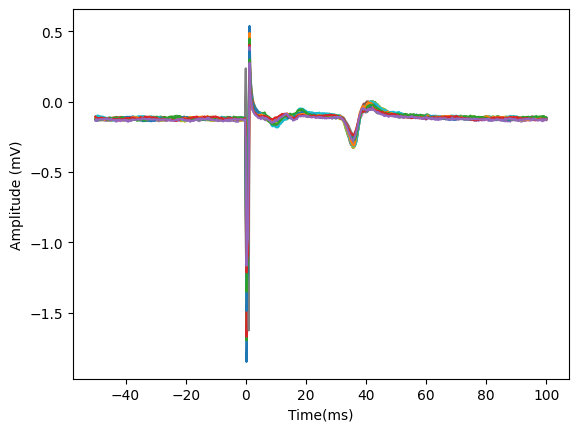

In [109]:
chNo = 1
import matplotlib.pyplot as plt
timeAxis = np.linspace(-pre_time_ms,post_time_ms,len(pages[0][0]))
for pg in range(len(pages)): 
    plt.plot(timeAxis,(pages[pg][chNo-1])*1000)
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time(ms)")

Text(0.5, 0, 'Time(ms)')

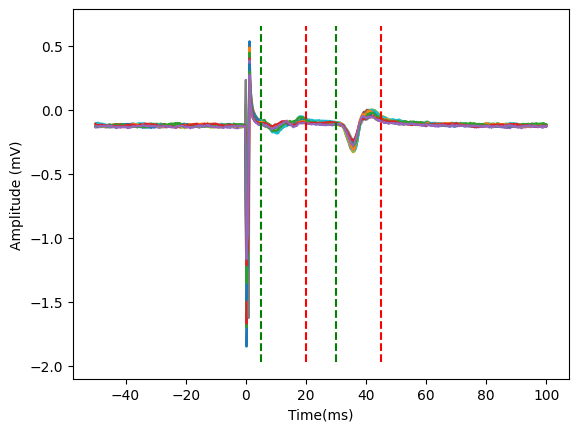

In [110]:
hOnset_ms = 30
mOnset_ms = 5
rangeTime_ms = 15

for pg in range(len(pages)): 
    plt.plot(timeAxis,(pages[pg][chNo-1]*1000))
ymin, ymax = plt.ylim()
plt.vlines(x=[hOnset_ms, mOnset_ms], ymin=ymin, ymax=ymax, colors='green', linestyles='dashed', label='vlines')
plt.vlines(x=[hOnset_ms+rangeTime_ms, mOnset_ms+rangeTime_ms], ymin=ymin, ymax=ymax, colors='r', linestyles='dashed', label='vlines')
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time(ms)")


In [118]:
HAmplitudes_mV = []
MAmplitudes_mV = []
for pgNo in range(len(pages)):
    indEpoch = pages[pgNo][chNo-1]
    hmSignal = manualEventDetect(indEpoch, pre_time_ms, samp_rate, hOnset_ms, mOnset_ms, rangeTime_ms)
    hAmp = round((max(hmSignal[0]) - min(hmSignal[0]))*1000,3)
    HAmplitudes_mV.append(hAmp)
    mAmp = round((max(hmSignal[1]) - min(hmSignal[1]))*1000,3)
    MAmplitudes_mV.append(mAmp)

print("the peak to peak H-Amplitudes are: ", HAmplitudes_mV)
print("the peak to peak M-Amplitudes are: ",MAmpllitudes_mV)

the peak to peak H-Amplitudes are:  [np.float64(0.276), np.float64(0.203), np.float64(0.324), np.float64(0.302), np.float64(0.271), np.float64(0.332), np.float64(0.258), np.float64(0.182), np.float64(0.332), np.float64(0.319), np.float64(0.24), np.float64(0.307), np.float64(0.256), np.float64(0.192), np.float64(0.23)]
the peak to peak M-Amplitudes are:  [np.float64(0.076), np.float64(0.093), np.float64(0.068), np.float64(0.059), np.float64(0.089), np.float64(0.084), np.float64(0.057), np.float64(0.043), np.float64(0.089), np.float64(0.136), np.float64(0.079), np.float64(0.055), np.float64(0.111), np.float64(0.039), np.float64(0.067)]


In [113]:
# extracting backRMS values and preparing it by average of certain values
Pages_backrms = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, avgFact = 1)
BackgroundRMS_mv = []
for pgNo_rms in range(len(Pages_backrms)):
    indEpoch_rms = Pages_backrms[pgNo_rms][chNo-1]
    RMS_signal = backRMS(indEpoch_rms, 50, 1, samp_rate, pre_time_ms)
    # removing DC offset
    RMS_noDCOffset = RMS_signal - np.mean(RMS_signal)
    rmsVal = round(np.sqrt(np.mean(RMS_noDCOffset**2))*1000,3)
    BackgroundRMS_mv.append(rmsVal)

print("number of pages read are: ", len(BackgroundRMS_mv))
print("The background RMS values are: ", BackgroundRMS_mv)


number of pages read are:  225
The background RMS values are:  [np.float64(0.016), np.float64(0.015), np.float64(0.018), np.float64(0.03), np.float64(0.018), np.float64(0.022), np.float64(0.017), np.float64(0.015), np.float64(0.016), np.float64(0.014), np.float64(0.014), np.float64(0.013), np.float64(0.013), np.float64(0.015), np.float64(0.014), np.float64(0.016), np.float64(0.018), np.float64(0.018), np.float64(0.018), np.float64(0.016), np.float64(0.017), np.float64(0.017), np.float64(0.014), np.float64(0.014), np.float64(0.016), np.float64(0.015), np.float64(0.019), np.float64(0.015), np.float64(0.015), np.float64(0.014), np.float64(0.019), np.float64(0.028), np.float64(0.017), np.float64(0.021), np.float64(0.026), np.float64(0.017), np.float64(0.018), np.float64(0.044), np.float64(0.033), np.float64(0.023), np.float64(0.013), np.float64(0.017), np.float64(0.014), np.float64(0.032), np.float64(0.015), np.float64(0.021), np.float64(0.016), np.float64(0.018), np.float64(0.017), np.flo

Text(0.5, 0, 'Time(ms)')

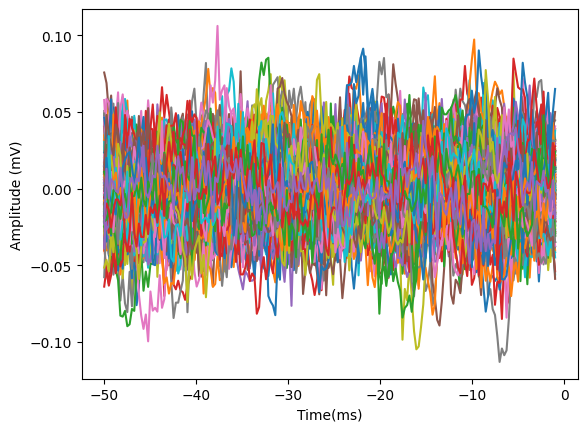

In [104]:
# Plotting the background RMS
RMS_timeax = np.linspace(-RMS_Signal_StartTime_ms, -RMS_Signal_EndTime_ms, len(RMS_signalArray[0]))

for RMS_no in range(len(RMS_signalArray)):
    plt.plot(RMS_timeax, RMS_signalArray[RMS_no]*1000)
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time(ms)")

In [116]:
avgBackgroundRMS_ms = avgVals(BackgroundRMS_mv, 15)

In [124]:
# creating a df to be exported as excel file

dict_outcome = {"HAmplitudes_mV": HAmplitudes_mV, "MAmplitudes_mV": MAmplitudes_mV, "avgBackgroundRMS_ms":avgBackgroundRMS_ms}
df_output = pd.DataFrame(dict_outcome)
display(df_output)

,HAmplitudes_mV,MAmplitudes_mV,avgBackgroundRMS_ms
0,0.276,0.076,0.016667
1,0.203,0.093,0.016133
2,0.324,0.068,0.022467
3,0.302,0.059,0.017267
4,0.271,0.089,0.019000
5,0.332,0.084,0.017200
6,0.258,0.057,0.019200
7,0.182,0.043,0.016267
8,0.332,0.089,0.021133
9,0.319,0.136,0.023333


In [123]:
print(len(HAmplitudes_mV))
print(len(MAmplitudes_mV))
print(len(avgBackgroundRMS_ms))

15
15
15
